In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Exercise 1 : Wildlife Strikes

#### Part 1 - Import and Explore Data

#####  1. Import the dataset strikes.csv with the functions read_csv of the library pandas 

In [ ]:
# Import the data

df = pd.read_csv('strikes.csv')

##### 2. Exploration of the data

In [4]:
# a. Shapes of the data
# write your code here

print(df.shape)

(78, 94)


In [5]:
# b. Display the four first rows of the DataFrame, the five last rows
# write your code here

display(df.head(4))
display(df.tail(5))

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10.0,34.0,10.0,A,4.0,...,Deleted,Deleted,1992-05-14 00:00:00,FAA Form 5200-7,Pilot,NaN,NaN,1996-03-14 00:00:00,0,0
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26.0,34.0,40.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0


,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
73,17458,MIL,MILITARY,C-135,148,NaN,NaN,NaN,A,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
74,17459,MIL,MILITARY,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
75,17460,MIL,MILITARY,C-40,148,NaN,22.0,NaN,A,4.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
76,17461,MIL,MILITARY,T-38,665,NaN,22.0,62.0,A,2.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,1
77,17462,MIL,MILITARY,H-60,813,NaN,NaN,NaN,B,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0


In [6]:
# c. Display the columns and row names
# write your code here

print("Columns:", df.columns.tolist())
print("Index:", df.index.tolist())

Columns: ['INDEX_NR', 'OPID', 'OPERATOR', 'ATYPE', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS', 'NUM_ENGS', 'TYPE_ENG', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'REG', 'FLT', 'REMAINS_COLLECTED', 'REMAINS_SENT', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'TIME', 'AIRPORT_ID', 'AIRPORT', 'STATE', 'FAAREGION', 'ENROUTE', 'RUNWAY', 'LOCATION', 'HEIGHT', 'SPEED', 'DISTANCE', 'PHASE_OF_FLT', 'DAMAGE', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'STR_ENG3', 'DAM_ENG3', 'STR_ENG4', 'DAM_ENG4', 'INGESTED', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', 'EFFECT', 'EFFECT_OTHER', 'SKY', 'PRECIP', 'SPECIES_ID', 'SPECIES', 'BIRDS_SEEN', 'BIRDS_STRUCK', 'SIZE', 'WARNED', 'COMMENTS', 'REMARKS', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COS

In [10]:
# d.	Get the number of occurances of birdstrike for each airline operator using the function value_count(). Save this number into the variable operator_counts. What is the type of this variable?
# write your code here

operator_counts = df['OPERATOR'].value_counts()
print(type(operator_counts)) 
print(operator_counts)

<class 'pandas.Series'>
OPERATOR
UNKNOWN                           13
UNITED AIRLINES                   10
AMERICAN AIRLINES                  9
SKYWEST AIRLINES                   6
MILITARY                           5
UPS AIRLINES                       3
BUSINESS                           3
FEDEX EXPRESS                      3
SOUTHWEST AIRLINES                 2
PINNACLE                           2
CONTINENTAL AIRLINES               2
ATLANTIC SOUTHEAST                 2
ABX AIR                            2
MESA AIRLINES                      2
EXPRESSJET AIRLINES                2
AIR MIDWEST                        1
AMERICAN EAGLE AIRLINES            1
COMAIR AIRLINES                    1
WINGS WEST                         1
AMERICA WEST AIRLINES              1
CHAUTAUQUA AIRLINES                1
EXPRESSJET (CONTINENTAL EXPRS)     1
AIRTRAN AIRWAYS                    1
CAPE AIR                           1
HORIZON AIR                        1
SUN COUNTRY AIRLINES               1
ENDEA

In [14]:
# e. Save the Operator name in a variable
# write your code here

operators = operator_counts.index.tolist()
print(operators)


['UNKNOWN', 'UNITED AIRLINES', 'AMERICAN AIRLINES', 'SKYWEST AIRLINES', 'MILITARY', 'UPS AIRLINES', 'BUSINESS', 'FEDEX EXPRESS', 'SOUTHWEST AIRLINES', 'PINNACLE', 'CONTINENTAL AIRLINES', 'ATLANTIC SOUTHEAST', 'ABX AIR', 'MESA AIRLINES', 'EXPRESSJET AIRLINES', 'AIR MIDWEST', 'AMERICAN EAGLE AIRLINES', 'COMAIR AIRLINES', 'WINGS WEST', 'AMERICA WEST AIRLINES', 'CHAUTAUQUA AIRLINES', 'EXPRESSJET (CONTINENTAL EXPRS)', 'AIRTRAN AIRWAYS', 'CAPE AIR', 'HORIZON AIR', 'SUN COUNTRY AIRLINES', 'ENDEAVOR AIR']


In [15]:
# f. Save the counts in another variable transforming the dataframe operator_counts into a numpy array.
# write your code here

counts = np.array(operator_counts)
print(counts)


[13 10  9  6  5  3  3  3  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1
  1  1  1]


#### Part 2 - Data Cleaning

##### Missing Value: 

# 1. Check the number of missing values per columns. 

3.	Decide: 
a.	Which columns should be dropped ?
b.	Which columns should be filled ?
c.	Fill missing values 



In [16]:
# write your code here

print(df.isnull().sum())

INDEX_NR             0
OPID                 0
OPERATOR             0
ATYPE                0
AMA                 15
                    ..
NR_INJURIES         78
NR_FATALITIES       78
LUPDATE              0
TRANSFER             0
INDICATED_DAMAGE     0
Length: 94, dtype: int64


In [17]:
# 2.	Calculated the percentages of missing values. 
# write your code here

missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct.sort_values(ascending=False))

NR_FATALITIES          100.0
EFFECT_OTHER           100.0
ENROUTE                100.0
COST_OTHER             100.0
COST_OTHER_INFL_ADJ    100.0
                       ...  
DAM_WING_ROT             0.0
STR_FUSE                 0.0
DAM_FUSE                 0.0
STR_LG                   0.0
INDICATED_DAMAGE         0.0
Length: 94, dtype: float64


In [ ]:
# 3.	Decide: 
        # a.	Which columns should be dropped ?
        # b.	Which columns should be filled ?
        # c.	Fill missing values 

threshold = 70
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()
df = df.drop(columns=cols_to_drop)

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("Missing values after cleaning:")
print(df.isnull().sum().sum())

Missing values after cleaning:
0


/var/folders/yn/1hnmpnk16xn182_0bz8_w3d00000gn/T/ipykernel_80865/3672361125.py:10: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns


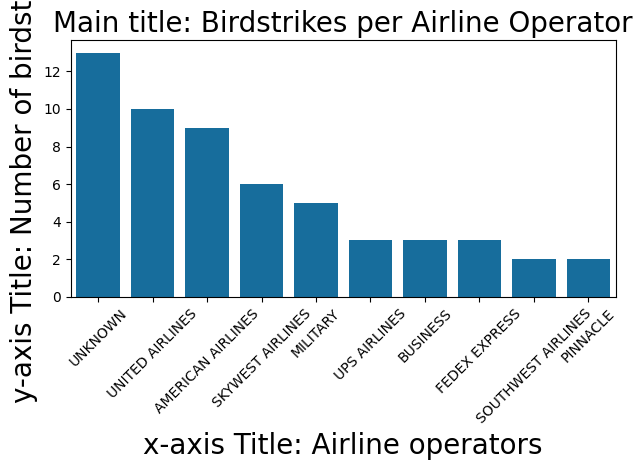

In [26]:
# write your code here

paired_palette = sns.color_palette("colorblind")
sns.set_palette(paired_palette, 10)
plt.xticks(rotation=45)
plt.xlabel("x-axis Title: Airline operators", fontsize=20)
plt.ylabel("y-axis Title: Number of birdstrikes", fontsize=20)
plt.title("Main title: Birdstrikes per Airline Operator", fontsize=20)
barplot = sns.barplot(x=operators[:10], y=counts[:10])
plt.tight_layout()
plt.show()

In [ ]:
# 4.	We now want to create barplots using the libraries matplotlib and seaborn to visualize occurances of birdstrike per airline operator. Comment the following lines
# paired_palette = sns.color_palette(“colorblind”)
# sns.set_palette(paired_palette, 10)
# plt.xticks(rotation=45)
# plt.xlabel(“x-axis Title: Airline operators”, fontsize=20)
# plt.ylabel(“y-axis Title: Number of birdstrikes”, fontsize=20)
# plt.title(“Main title: Birdstrikes per Airline Operator”, fontsize=20)
# barplot = sns.barplot(x=operators[:10], y=counts[:10]

## Exercise 2: Survival on titanic dataset

#### Part 1 - Importation of the data and description of the dataset

In [27]:
# 1.	In the first practical session, download the dataset and set the dataset as Dataframe. 
# write your code here

df_titanic = pd.read_csv('titanic.csv')


In [28]:
# 2.	Describe the dataset titanic: features, nature of the features, number of observations. 
# write your code here

print("Shape:", df_titanic.shape)
print("\nFeature types:\n", df_titanic.dtypes)
print("\nFirst 5 rows:")
display(df_titanic.head())

Shape: (891, 12)

Feature types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# 3.	Basic statistics: mean of each variable, quartiles
# write your code here

display(df_titanic.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# 4.	Percentage of missing values for each column. Sort by descending values.
# write your code here

missing_pct = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(missing_pct.sort_values(ascending=False))

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


#### Part 2: Remove Irrelevant Features
Remove : 
-	PassengerId
-	Ticket
-	Name
Explain why these columns are removed. ( 2 – 3 Paragraph). (Write in Markdown)

In [31]:
df_titanic = df_titanic.drop(columns=['PassengerId', 'Ticket', 'Name'])
display(df_titanic.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


PassengerId is simply a row index assigned arbitrarily to each passenger. 
It carries no meaningful information about survival and would only introduce 
noise into any analysis or model.

The Ticket column contains alphanumeric ticket numbers that are largely unique 
to each passenger. Without extensive feature engineering, these values have no 
predictive relationship with survival and would be treated as high-cardinality 
noise.

The Name column, while unique to each passenger, does not directly contribute 
to survival prediction. Although titles (Mr., Mrs., Miss.) embedded in names 
could be extracted, this is beyond the scope of basic preprocessing and the 
raw column itself is not useful as-is.

#### Part 3: Missing Values 

# write your code here


In [32]:
# 1.	Compute missing value percentages. 

missing_pct2 = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(missing_pct2.sort_values(ascending=False))


Cabin       77.104377
Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
dtype: float64


In [33]:
# 2.	Handing missing values:
# •	Age -> median 
# •	Embarked -> mode 
# •	Cabin -> drop or justify decision

df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

df_titanic = df_titanic.drop(columns=['Cabin'])

print("Missing values after handling:")
print(df_titanic.isnull().sum())

Missing values after handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Part 4: Encoding
Encode: 
-	Sex
-	Embarked 
Use: 
-	Label Encoding or one-hot Encoding

In [35]:
# write your code here

le = LabelEncoder()

df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], prefix='Embarked')

display(df_titanic.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


#### Part 5: Scaling
1.	Scale numerical features: 
•	Age 
•	Fare
Use:
•	Min-Max Scaling or Standardization

In [37]:
# write your code here

scaler = MinMaxScaler()

df_titanic[['Age', 'Fare']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])

display(df_titanic[['Age', 'Fare']].head())

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


#### Part 6: Outlier Detection

In [38]:
# 1.	Detect outlier in Dare using IQR 
# write your code here

Q1 = df_titanic['Fare'].quantile(0.25)
Q2 = df_titanic['Fare'].quantile(0.50)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_titanic[(df_titanic['Fare'] < lower_bound) | (df_titanic['Fare'] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")
print(f"Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}")

Number of outliers in Fare: 116
Lower bound: -0.0522, Upper bound: 0.1281


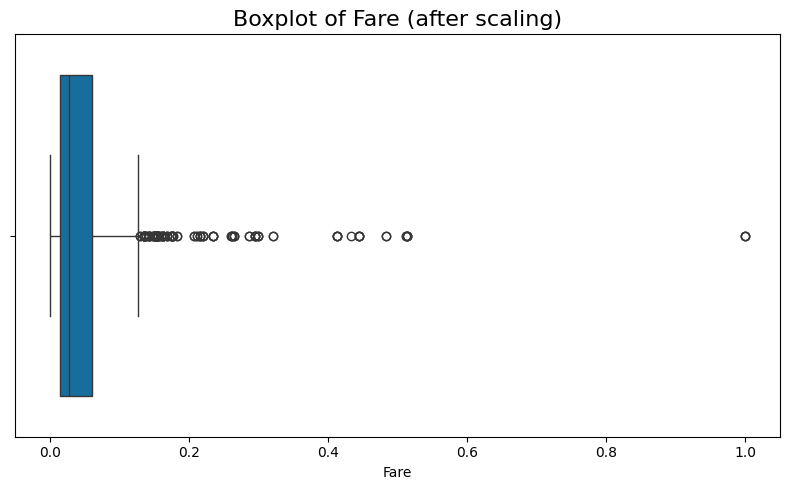

In [39]:
# 2. Visualization using boxplot 
# write your code here

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_titanic['Fare'])
plt.title('Boxplot of Fare (after scaling)', fontsize=16)
plt.xlabel('Fare')
plt.tight_layout()
plt.show()

In [ ]:
# 3.	Explain whether you remove them or not ?
# write your code here

We choose NOT to remove the Fare outliers. High fares correspond to 1st class 
passengers, which is a meaningful and legitimate segment of the data. Removing 
them would bias the dataset and potentially remove passengers whose class may 
have played a significant role in their survival. The outliers here are 
informative, not erroneous.

Basic graphic analysis
We want to understand what features could contributes to a high survival rate. It would make sense if everything would be correlated with a high survival rate. 
1.	We focus on the features ‘Age’ and ‘Sex’
a.	Separate the dataset into men and women 
b.	Display the distribution of the age survivors and non survivors according to the ‘Sex’. 
2.	At first glance is there some link between ‘Embarked’ and ‘Survival’. 
3.	At first glance is there some link between ‘Pclass’ and ‘Survival’.

Write your explaination in the markdowns !

write your explain here ! 

In [ ]:
# Separate by sex

men = df_titanic[df_titanic['Sex'] == 1]
women = df_titanic[df_titanic['Sex'] == 0]

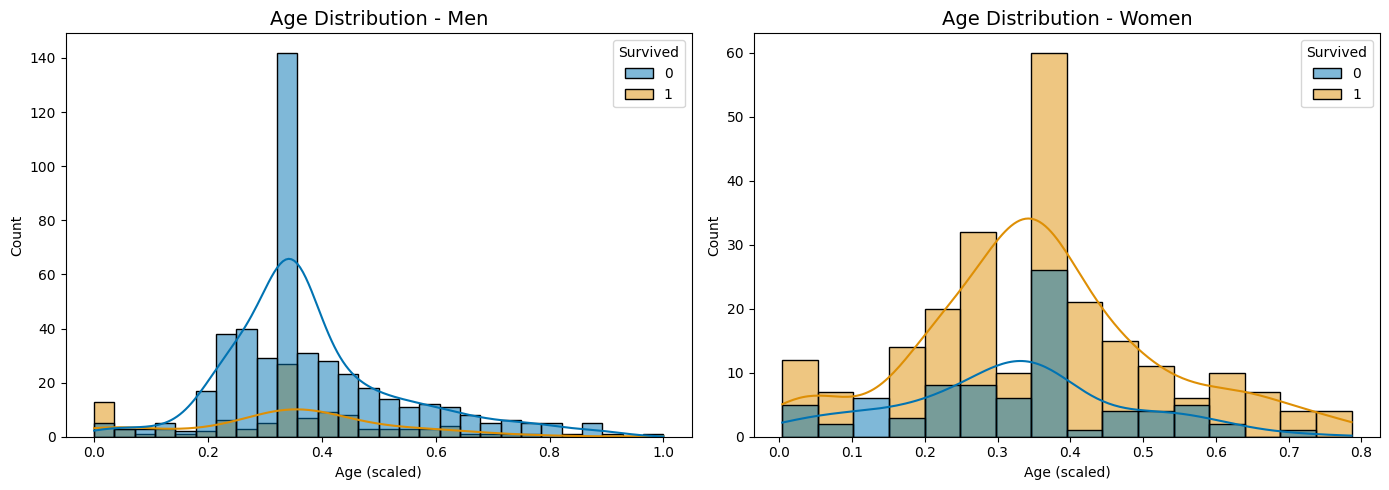

In [ ]:
# Age distribution by sex and survival

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Men
axes[0].set_title('Age Distribution - Men', fontsize=14)
sns.histplot(data=men, x='Age', hue='Survived', ax=axes[0], kde=True)
axes[0].set_xlabel('Age (scaled)')

# Women
axes[1].set_title('Age Distribution - Women', fontsize=14)
sns.histplot(data=women, x='Age', hue='Survived', ax=axes[1], kde=True)
axes[1].set_xlabel('Age (scaled)')

plt.tight_layout()
plt.show()

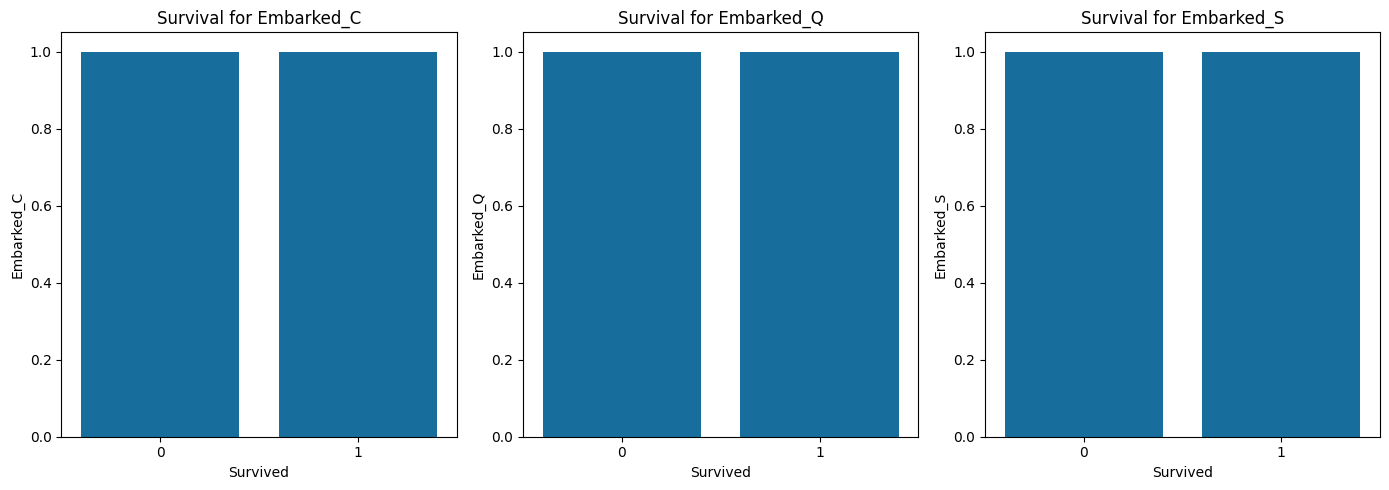

In [ ]:
# Embarked vs Survival

embarked_cols = [col for col in df_titanic.columns if col.startswith('Embarked_')]

fig, axes = plt.subplots(1, len(embarked_cols), figsize=(14, 5))
for i, col in enumerate(embarked_cols):
    sns.barplot(data=df_titanic[df_titanic[col] == 1], 
                x='Survived', y=col, ax=axes[i])
    axes[i].set_title(f'Survival for {col}', fontsize=12)

plt.tight_layout()
plt.show()

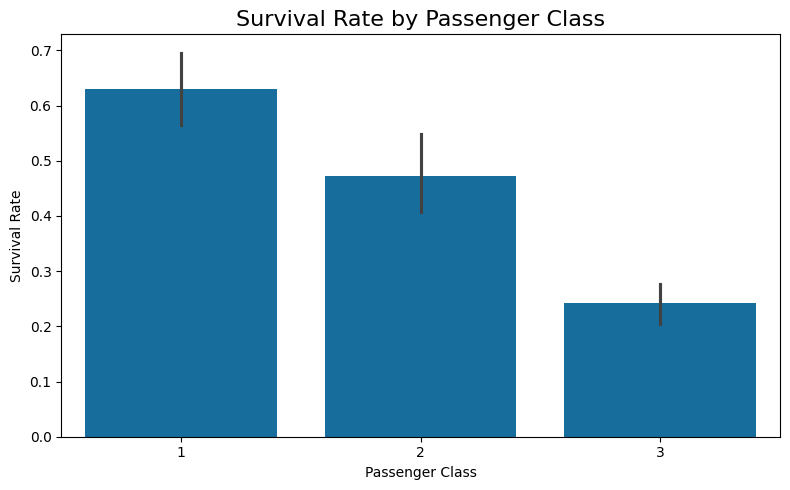

In [ ]:
# Pclass vs Survival

plt.figure(figsize=(8, 5))
sns.barplot(data=df_titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

1. Age & Sex: Women have a significantly higher survival rate than men across 
all age groups, consistent with the "women and children first" evacuation 
policy. Among men, younger passengers had a slightly better chance of survival.

2. Embarked: Passengers who embarked from Cherbourg (C) show a slightly higher 
survival rate, possibly because more 1st class passengers boarded there.

3. Pclass: There is a clear link between class and survival. 1st class passengers 
had the highest survival rate, while 3rd class had the lowest, suggesting that 
wealth and cabin location significantly influenced access to lifeboats.